In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline # give tools and run it to speed 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [2]:
mnist= fetch_openml('mnist_784', version=1) # , cache=True , as_frame=False

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#mnist.feature_names

In [ ]:
mnist.DESCR

In [ ]:
mnist.data[:100]

In [3]:
X = mnist['data']

In [4]:
y = mnist['target']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
print('y Columns are: \n' , mnist.target_names)

## Cleaning data - SimpleImputer 

In [5]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)

## train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(np.float32), y.astype(np.float32), random_state=42, test_size=0.10)

In [ ]:
X_train.shape

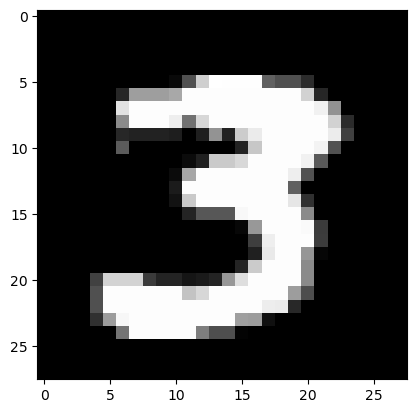

In [7]:
fig_model= plt.imshow(X[27].reshape(28, 28), cmap='gray')
fig_model.figure
plt.show(fig_model)

In [ ]:
#X_train[1]

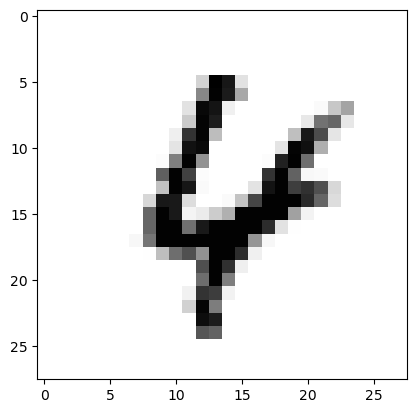

In [8]:
fig_model= plt.imshow(X_train[10].reshape(28, 28), cmap='Greys')
fig_model.figure
plt.show(fig_model)

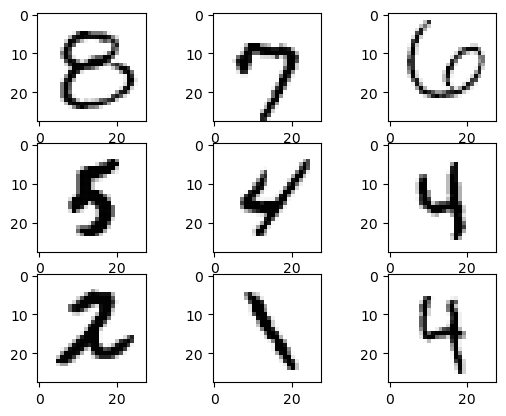

In [9]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')

## LogisticRegression 

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
lr.score(X_train,y_train)

0.9347301587301587

In [ ]:
lr.score(X_test,y_test)

In [14]:
y_pred = lr.predict(X_test)
print (y_pred[:3])
print(y_test[:3])
print (y_train[:3])

[8. 4. 8.]
46730    8.0
48393    4.0
41416    8.0
Name: class, dtype: float32
42878    8.0
5946     7.0
33058    6.0
Name: class, dtype: float32


In [ ]:
#X_train  = X_train / 255.0
#y_test = y_test / 255.0

8.0


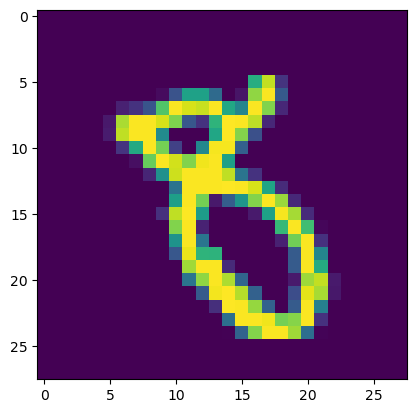

In [12]:
plt.imshow(X_test[2].reshape(28, 28))
prediction=lr.predict(X_test)
print(prediction[2])

In [ ]:
print('Test Value for LogisticRegressionModel is : ' , y_test[:3])
print('Train Value for LogisticRegressionModel is : ' , y_train[:3])
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:3])

In [15]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# true positive , 
#false positve ,    
# false negative ,
# true negative : 

Confusion Matrix is : 
 [[660   0   2   0   1   8   6   2   4   0]
 [  0 781   3   5   1   3   0   2   4   1]
 [  2  12 600  12   8   2  15   6  15   2]
 [  1   5  18 693   1  15   2   7  10   8]
 [  1   0   5   1 564   3   6   3   5  23]
 [  4   4   5  30   7 562   8   1  29   8]
 [  6   2   7   0   9   6 643   2   2   0]
 [  0   1  17   1   6   1   0 678   2  18]
 [  7  11   8  23   3  19   6   5 602   9]
 [  3   6   2   7  16   3   0  20   9 654]]


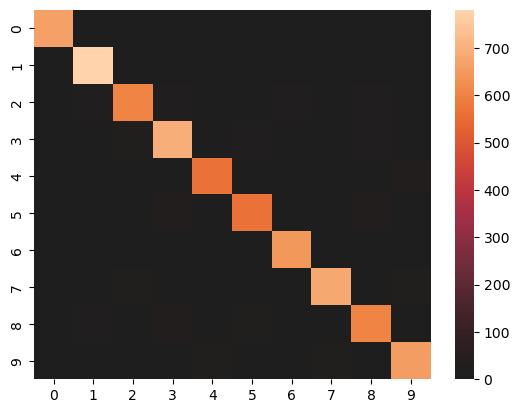

In [16]:
# drawing confusion matrix
figs = sns.heatmap(CM, center = True)

## Ploting 

In [17]:
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise
noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

In [18]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((28, 28)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

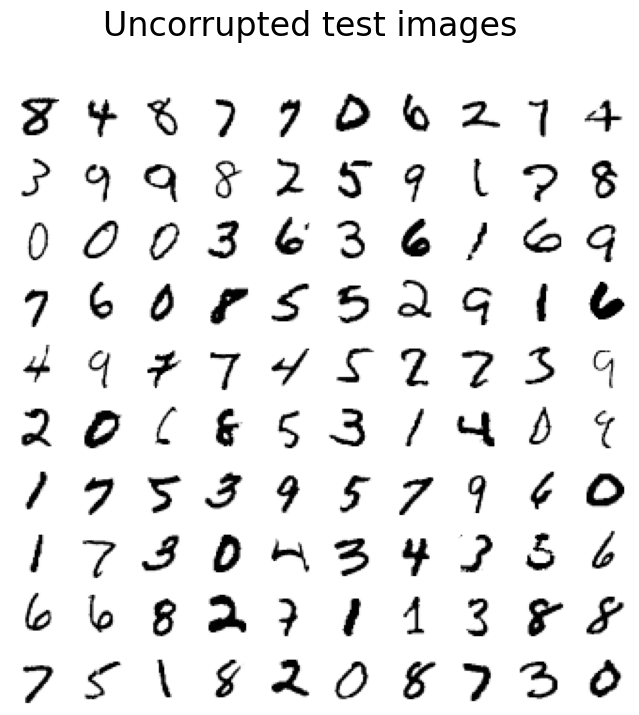

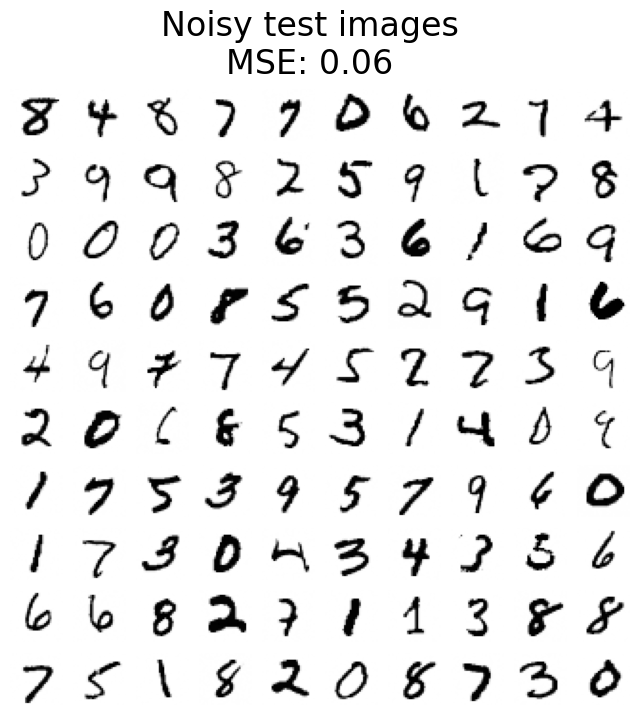

In [19]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}")

## Regresion Pipline Test 

In [ ]:
steps1 = [
    ('scalar', StandardScaler()),   
    ('poly', PolynomialFeatures(degree=1)),
    ('model', LogisticRegression())]

In [ ]:
lr_pipe = Pipeline(steps1)
lr_pipe.fit(X_train, y_train)

In [ ]:
lr_pipe.score (X_train,y_train)

In [ ]:
lr_pipe.score (X_test,y_test)

9.0


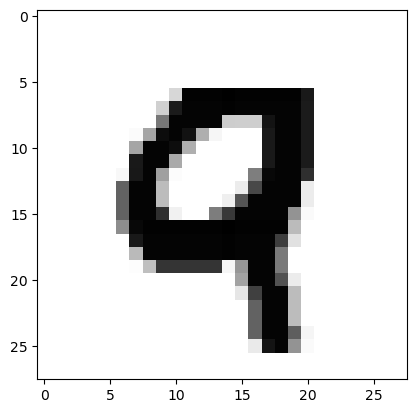

In [20]:
plt.imshow(X_test[250].reshape(28, 28),cmap="Greys")
prediction=lr.predict(X_test)
print(prediction[250])

In [21]:
ClassificationReport = classification_report(y_test,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       683
         1.0       0.95      0.98      0.96       800
         2.0       0.90      0.89      0.89       674
         3.0       0.90      0.91      0.90       760
         4.0       0.92      0.92      0.92       611
         5.0       0.90      0.85      0.88       658
         6.0       0.94      0.95      0.94       677
         7.0       0.93      0.94      0.94       724
         8.0       0.88      0.87      0.88       693
         9.0       0.90      0.91      0.91       720

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



## KNN 

In [22]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
knn.score(X_train,y_train)

0.9829682539682539

In [25]:
knn.score(X_test,y_test)

0.9698571428571429

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.973      0.96757143 0.97171429 0.97228571 0.97014286 0.97014286
 0.96557143 0.97057143 0.96871429 0.97514286]


3.0


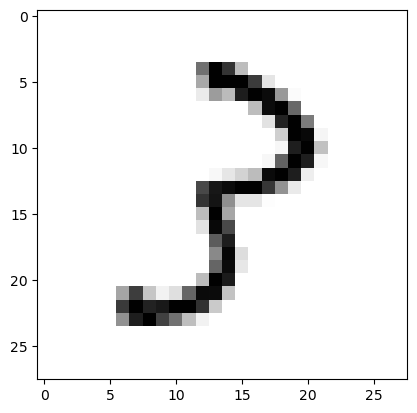

In [27]:
plt.imshow(X_test[10].reshape(28, 28),cmap="Greys")
prediction=knn.predict(X_test)
print(prediction[10])

In [28]:
y1_pred = knn.predict(X_test)

In [33]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y1_pred)
print('Confusion Matrix is : \n', CM)
# true positive , 
#false positve ,    
# false negative ,
# true negative : 

Confusion Matrix is : 
 [[681   0   1   0   0   0   0   0   1   0]
 [  0 797   1   0   1   0   0   0   0   1]
 [  4  10 652   0   1   0   1   4   1   1]
 [  0   2   9 736   0   3   0   3   3   4]
 [  1   3   1   0 594   0   1   3   0   8]
 [  0   3   0  16   0 632   5   0   1   1]
 [  3   1   0   0   3   3 667   0   0   0]
 [  0  15   5   0   3   0   0 698   0   3]
 [  3  10   1  12   2  12   5   6 640   2]
 [  2   3   0   6   5   0   0  11   1 692]]


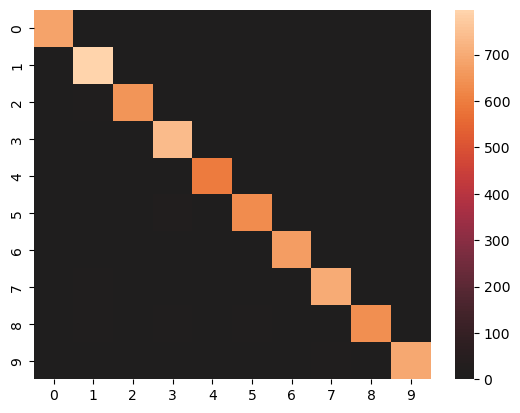

In [34]:
# drawing confusion matrix
figs = sns.heatmap(CM, center = True)

## KNN Pipline 

In [ ]:
# Pipeline
steps4 = [
    ('scalar', StandardScaler()),   
#   ('poly', PolynomialFeatures(degree=1)),
    ('model', KNeighborsClassifier(n_neighbors = 2))
]

In [ ]:
knn_pipe = Pipeline(steps4)
knn_pipe.fit(X_train, y_train)

In [ ]:
# Train Score 
knn_pipe.score (X_train,y_train)

In [ ]:
# Test Score 
knn_pipe.score (X_test,y_test)

In [ ]:
y_knn_pred = knn_pipe.predict(X_test)

In [ ]:
y_pred_prob = knn.predict_proba(X_test)

In [ ]:
y_pred_prob[:3]

In [ ]:
# find the best neighbors
from sklearn import metrics
k_range = range(1,5)
scores = []
for k in k_range:
    print ('for Neighbors number :',k)
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X.astype(np.float32), y.astype(np.float32))
    print('KNeighborsClassifier Train Score is : ' , knn.score(X_train, y_train))
    print('KNeighborsClassifier Test Score is  : ' , knn.score(X_test, y_test))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
    print('------------------------')

In [ ]:
plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')

## Results 

In [30]:
lrr = lr.score(X_train,y_train)
knnn = knn.score(X_train,y_train)
if lrr > knnn:
    print ('logistice regretion is Best Modul with score', lrr)
else:
    print('KNeighborsClassifier is the best Modul with score :' , knnn)

KNeighborsClassifier is the best Modul with score : 0.9829682539682539


In [ ]:
plt.figure (figsize=(5,3))
model = ['lrr','knnn']
plt.bar(model , height= 1)
plt.xlabel('hist')
plt.xlabel("model")
plt.ylabel("score ")
plt.title("Diffirents between models")
plt.tight_layout()
plt.show()